C:\Users\udit4\AppData\Local\Temp\ipykernel_23796\2793939840.py:65: RuntimeWarning: invalid value encountered in divide
  drawdown = (peak - portfolio_value) / peak


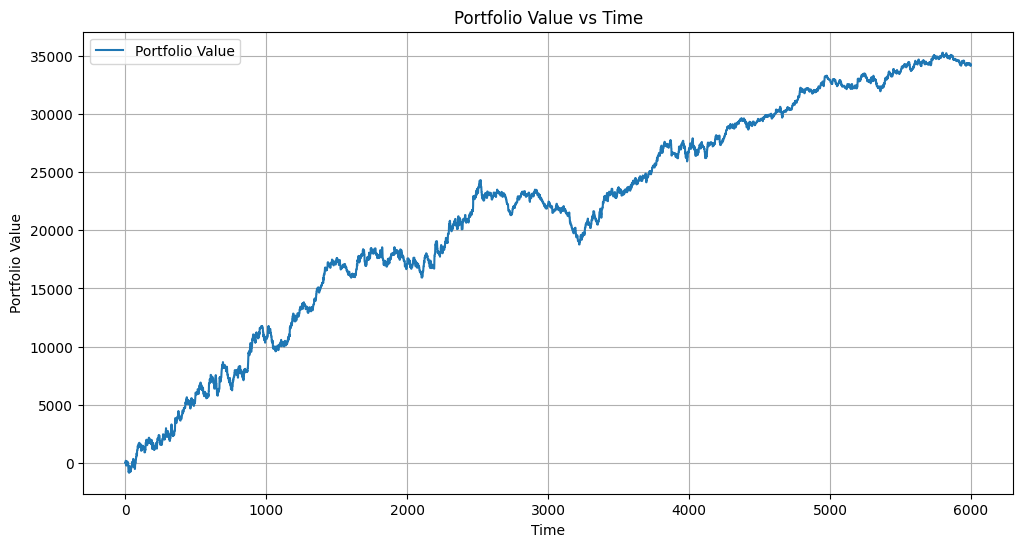

Optimal L: 0.13894736842105262
Optimal B: 0.17473684210526313
Net PnL: 34219.50472330206
Max Drawdown: nan


In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from itertools import product

# Load the CSV file
data = pd.read_csv("assign6.csv")  # Replace with your file path
asset_price = data['price'].values
alpha = data['alpha'].values

# Define the dual-threshold strategy
def simulate_strategy(alpha, asset_price, L, B):
    position = 0  # 1 for long, -1 for short, 0 for no position
    pnl = 0
    portfolio_value = []
    entry_price = 0
    
    for i in range(len(alpha)):
        if position == 0:  # No position
            if alpha[i] > B:
                position = 1
                entry_price = asset_price[i]
            elif alpha[i] < -B:
                position = -1
                entry_price = asset_price[i]
        elif position == 1:  # Long position
            if alpha[i] < L:
                pnl += asset_price[i] - entry_price
                position = 0
        elif position == -1:  # Short position
            if alpha[i] > -L:
                pnl += entry_price - asset_price[i]
                position = 0
        # Calculate portfolio value
        if position == 1:
            portfolio_value.append(pnl + (asset_price[i] - entry_price))
        elif position == -1:
            portfolio_value.append(pnl + (entry_price - asset_price[i]))
        else:
            portfolio_value.append(pnl)
    
    return pnl, portfolio_value

# Grid search to find optimal thresholds
L_values = np.linspace(0.01, 0.5, 20)  # Adjust range and step as needed
B_values = np.linspace(0.02, 1.0, 20)  # B > L

best_pnl = -np.inf
best_L, best_B = 0, 0
best_portfolio_value = []

for L, B in product(L_values, B_values):
    if L >= B:
        continue
    pnl, portfolio_value = simulate_strategy(alpha, asset_price, L, B)
    if pnl > best_pnl and pnl > 30000:  # Target PnL > 30k
        best_pnl = pnl
        best_L, best_B = L, B
        best_portfolio_value = portfolio_value

# Calculate max drawdown and hit ratio
def calculate_metrics(portfolio_value):
    portfolio_value = np.array(portfolio_value)
    peak = np.maximum.accumulate(portfolio_value)
    drawdown = (peak - portfolio_value) / peak
    max_drawdown = np.max(drawdown)
    return max_drawdown

max_drawdown = calculate_metrics(best_portfolio_value)

# Plot portfolio value
plt.figure(figsize=(12, 6))
plt.plot(best_portfolio_value, label="Portfolio Value")
plt.title("Portfolio Value vs Time")
plt.xlabel("Time")
plt.ylabel("Portfolio Value")
plt.legend()
plt.grid()
plt.show()

# Print results
print(f"Optimal L: {best_L}")
print(f"Optimal B: {best_B}")
print(f"Net PnL: {best_pnl}")
print(f"Max Drawdown: {max_drawdown}")
